# Homework 14 Group ONE

In [69]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

### states file

In [70]:
states = gpd.read_file("/Users/aspasiadaskalopoulou/Desktop/found/14-classwork/14-homework-powerplants/cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [71]:
states.crs

{'init': 'epsg:4269'}

In [72]:
states = states[(states.STUSPS != 'AK') & (states.STUSPS != 'HI') & (states.STUSPS != 'VI') & (states.STUSPS != 'AS') & (states.STUSPS != 'PR') & (states.STUSPS != 'GU') & (states.STUSPS != 'MP')] 

In [73]:
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."


### powerplants.csv

In [74]:
df_pp = pd.read_csv("powerplants.csv")
df_pp.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823


In [75]:
points = df_pp.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
geo_pp = gpd.GeoDataFrame(df_pp, geometry=points)
geo_pp.crs = {'init': 'epsg:4269'}
geo_pp.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)


### pm25_annual_fixed.csv

In [76]:
df_pm25 = pd.read_csv("pm25_annual_fixed.csv")
pd.set_option('display.max_columns', 999)
df_pm25.head(1)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18


In [77]:
df_pm25.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Metric Used', 'Method Name', 'Year',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Completeness Indicator', 'Valid Day Count',
       'Required Day Count', 'Exceptional Data Count', 'Null Data Count',
       'Primary Exceedance Count', 'Secondary Exceedance Count',
       'Certification Indicator', 'Num Obs Below MDL', 'Arithmetic Mean',
       'Arithmetic Standard Dev', '1st Max Value', '1st Max DateTime',
       '2nd Max Value', '2nd Max DateTime', '3rd Max Value',
       '3rd Max DateTime', '4th Max Value', '4th Max DateTime',
       '1st Max Non Overlapping Value', '1st NO Max DateTime',
       '2nd Max Non Overlapping Value', '2nd NO Max DateTime',
       '99th Percentile', '98th Percentile', '95th Percentile',
       '90th Percentile', '75th Percentile', '

### Total Carbon Dioxide Emissions-StateRankings.csv

In [78]:
df_co2 = pd.read_csv("Total Carbon Dioxide Emissions-StateRankings.csv")
# Total Carbon Dioxide Emissions, million metric tons
df_co2.head(1)

,Rank,State,CO2
0,1,TX,642.0


### annual_conc_by_monitor_2017.csv

In [79]:
df_stations = pd.read_csv("annual_conc_by_monitor_2017.csv")
df_stations.head(1)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,Ozone 1-hour Daily 2005,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,2017,Parts per million,No Events,666,12,N,29,245,0,78,0.0,0.0,Certification not required,0,0.049241,0.008327,0.06,2017-03-19 15:00,0.06,2017-03-31 16:00,0.058,2017-03-20 14:00,0.057,2017-03-04 14:00,NaN,NaN,NaN,NaN,0.06,0.06,0.06,0.058,0.056,0.051,0.035,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18


## 1. Make a map of power plants in the US, color coded by type


(-130.0, -50.0, 20.0, 50.0)

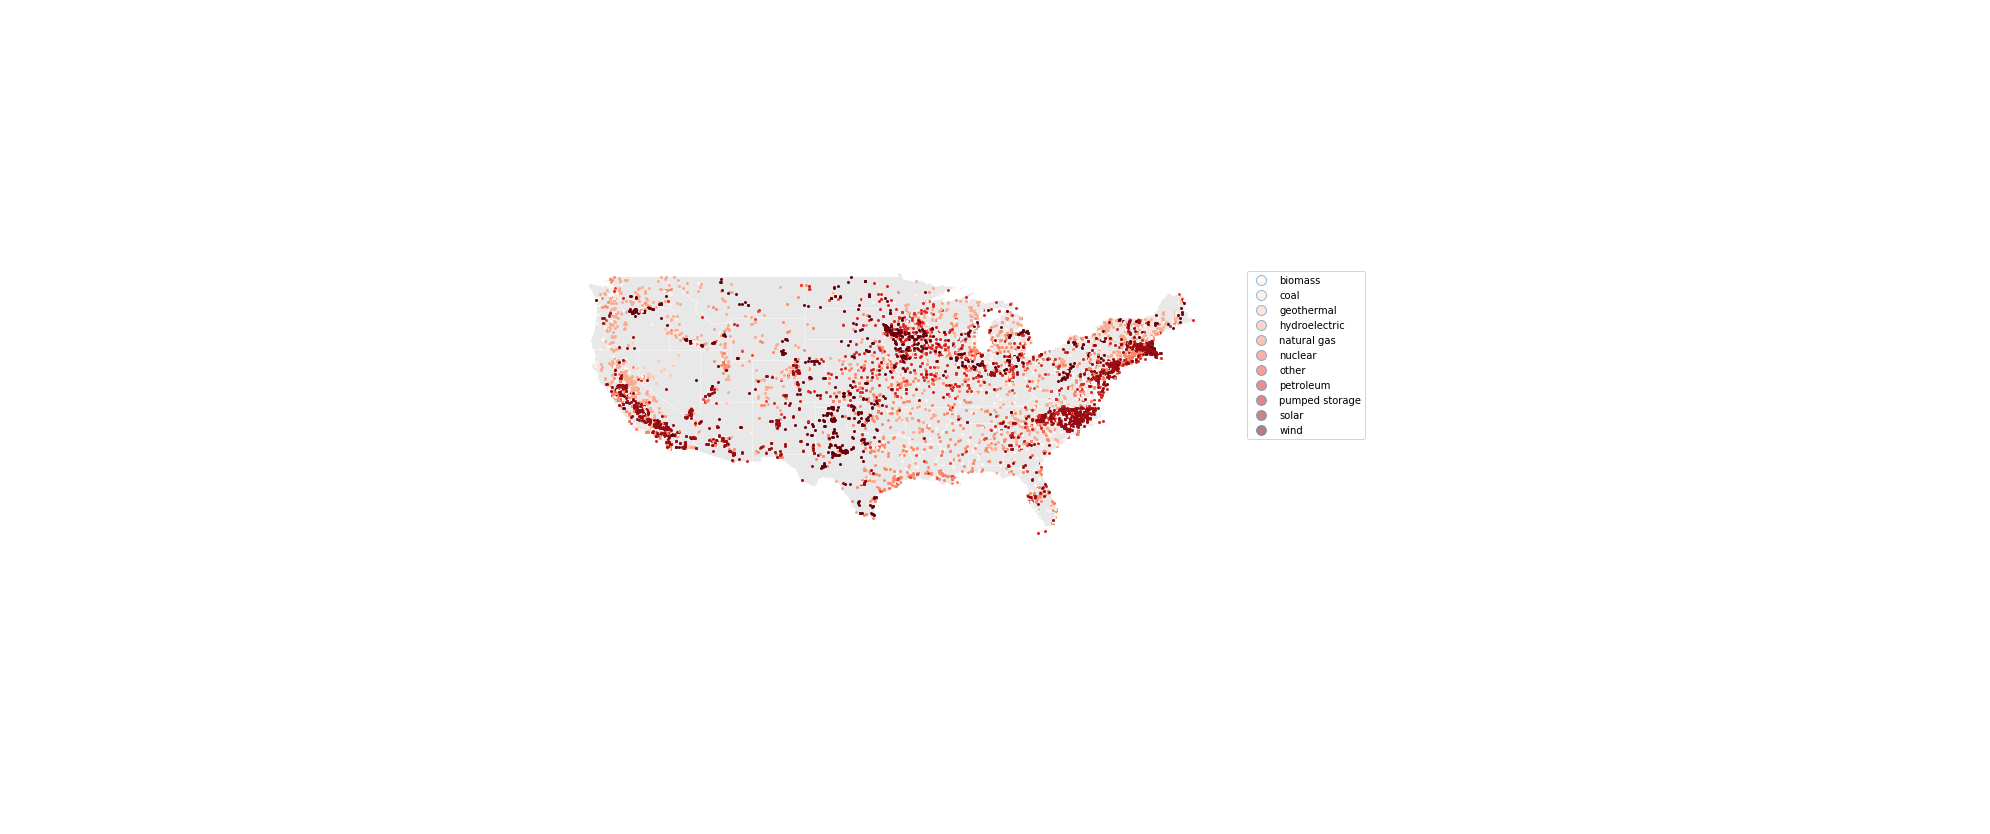

In [80]:
ax = states.plot(figsize=(15,15), color='lightgrey', linewidth=0.2, edgecolor='white')
geo_pp.plot(figsize=(20,20), ax=ax, column='PrimSource', markeredgewidth=0, markersize=3, legend=True, cmap='Reds')
ax.set_xlim(-130,-50)
ax.set_ylim(20,50)
ax.axis('off')

(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

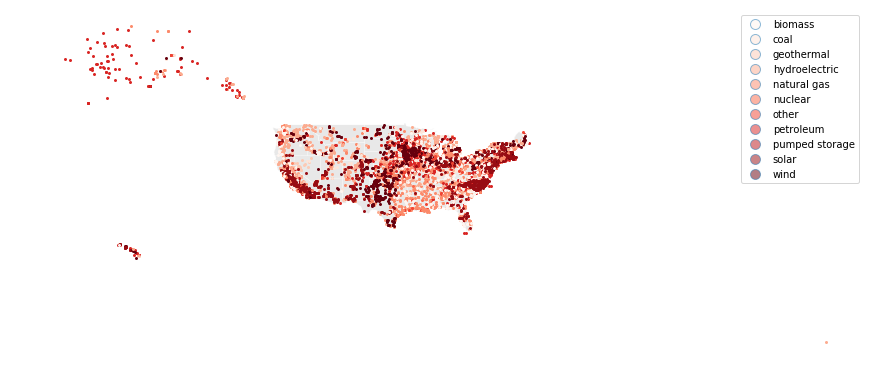

In [81]:
ax = states.plot(figsize=(15,15), color='lightgrey', linewidth=0.2, edgecolor='white')
geo_pp.plot(ax=ax, column='PrimSource', markeredgewidth=0, markersize=3, legend=True, cmap='Reds')
ax.axis('off')

## 2. Make a map of air quality stations, color coded by average air quality


In [82]:
points = df_pm25.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
geo_pm25 = gpd.GeoDataFrame(df_pm25, geometry=points)
geo_pm25.crs = {'init': 'epsg:4269'}

(-130.0, -50.0, 20.0, 50.0)

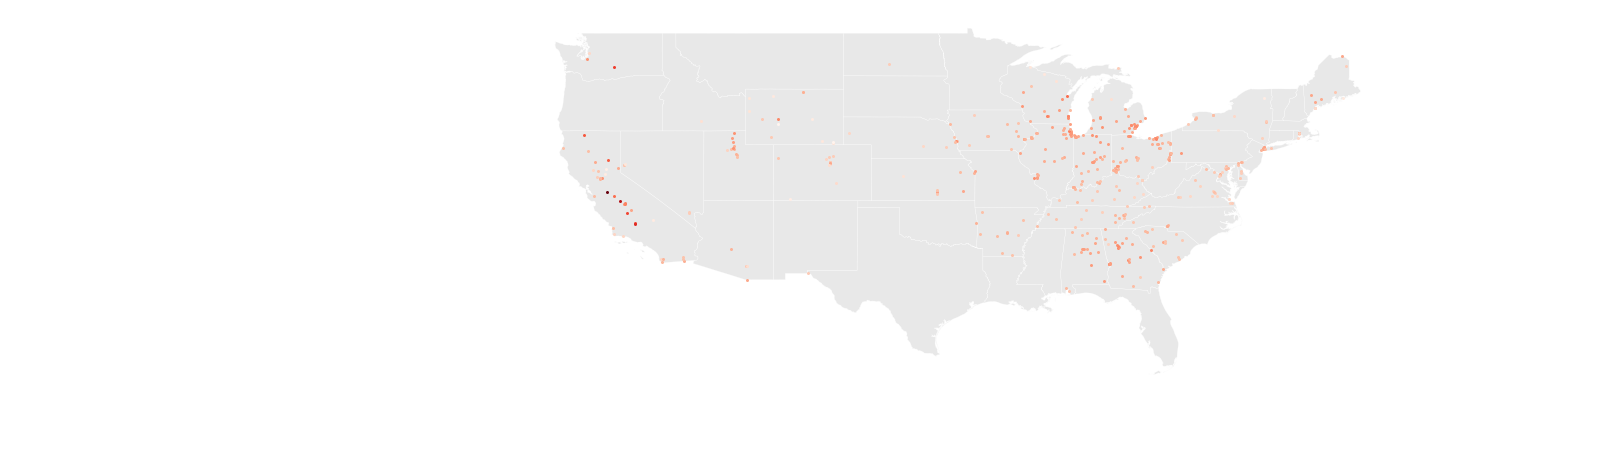

In [83]:
ax = states.plot(figsize=(20,20), color='lightgrey', linewidth=0.2, edgecolor='white')
geo_pm25.plot(figsize=(20,20), column= 'Arithmetic Mean', cmap='Reds', ax=ax, markeredgewidth=0, markersize=3)
ax.set_xlim(-130,-50)
ax.set_ylim(20,50)
ax.axis('off')

## 3. Make a map of air quality stations, color coded by worst air quality ever 


(-130.0, -50.0, 20.0, 50.0)

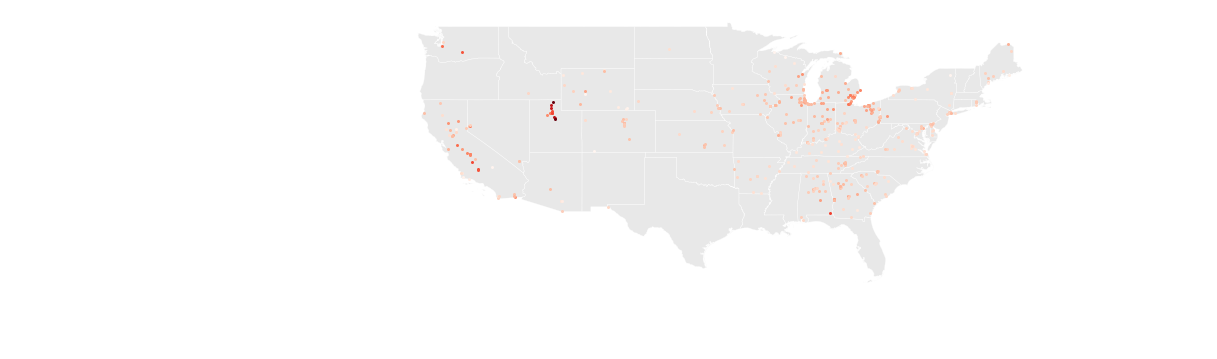

In [84]:
ax = states.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
geo_pm25.plot(column= '1st Max Value', cmap='Reds', ax=ax, markeredgewidth=0, markersize=3)
ax.set_xlim(-130,-50)
ax.set_ylim(20,50)
ax.axis('off')

## 4. Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.

In [85]:
geo_pp['Utility_Na'].value_counts().head()

Pacific Gas & Electric Co        82
Erie Boulevard Hydropower LP     71
Sustainable Power Group, LLC     63
Southern California Edison Co    62
PacifiCorp                       59
Name: Utility_Na, dtype: int64

In [86]:
common = geo_pp[geo_pp['Utility_Na'].isin(['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP', 'Sustainable Power Group, LLC', 'Southern California Edison Co', 'PacifiCorp'])]
rest = geo_pp[~geo_pp['Utility_Na'].isin(['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP', 'Sustainable Power Group, LLC', 'Southern California Edison Co', 'PacifiCorp'])]

(-130.0, -50.0, 20.0, 50.0)

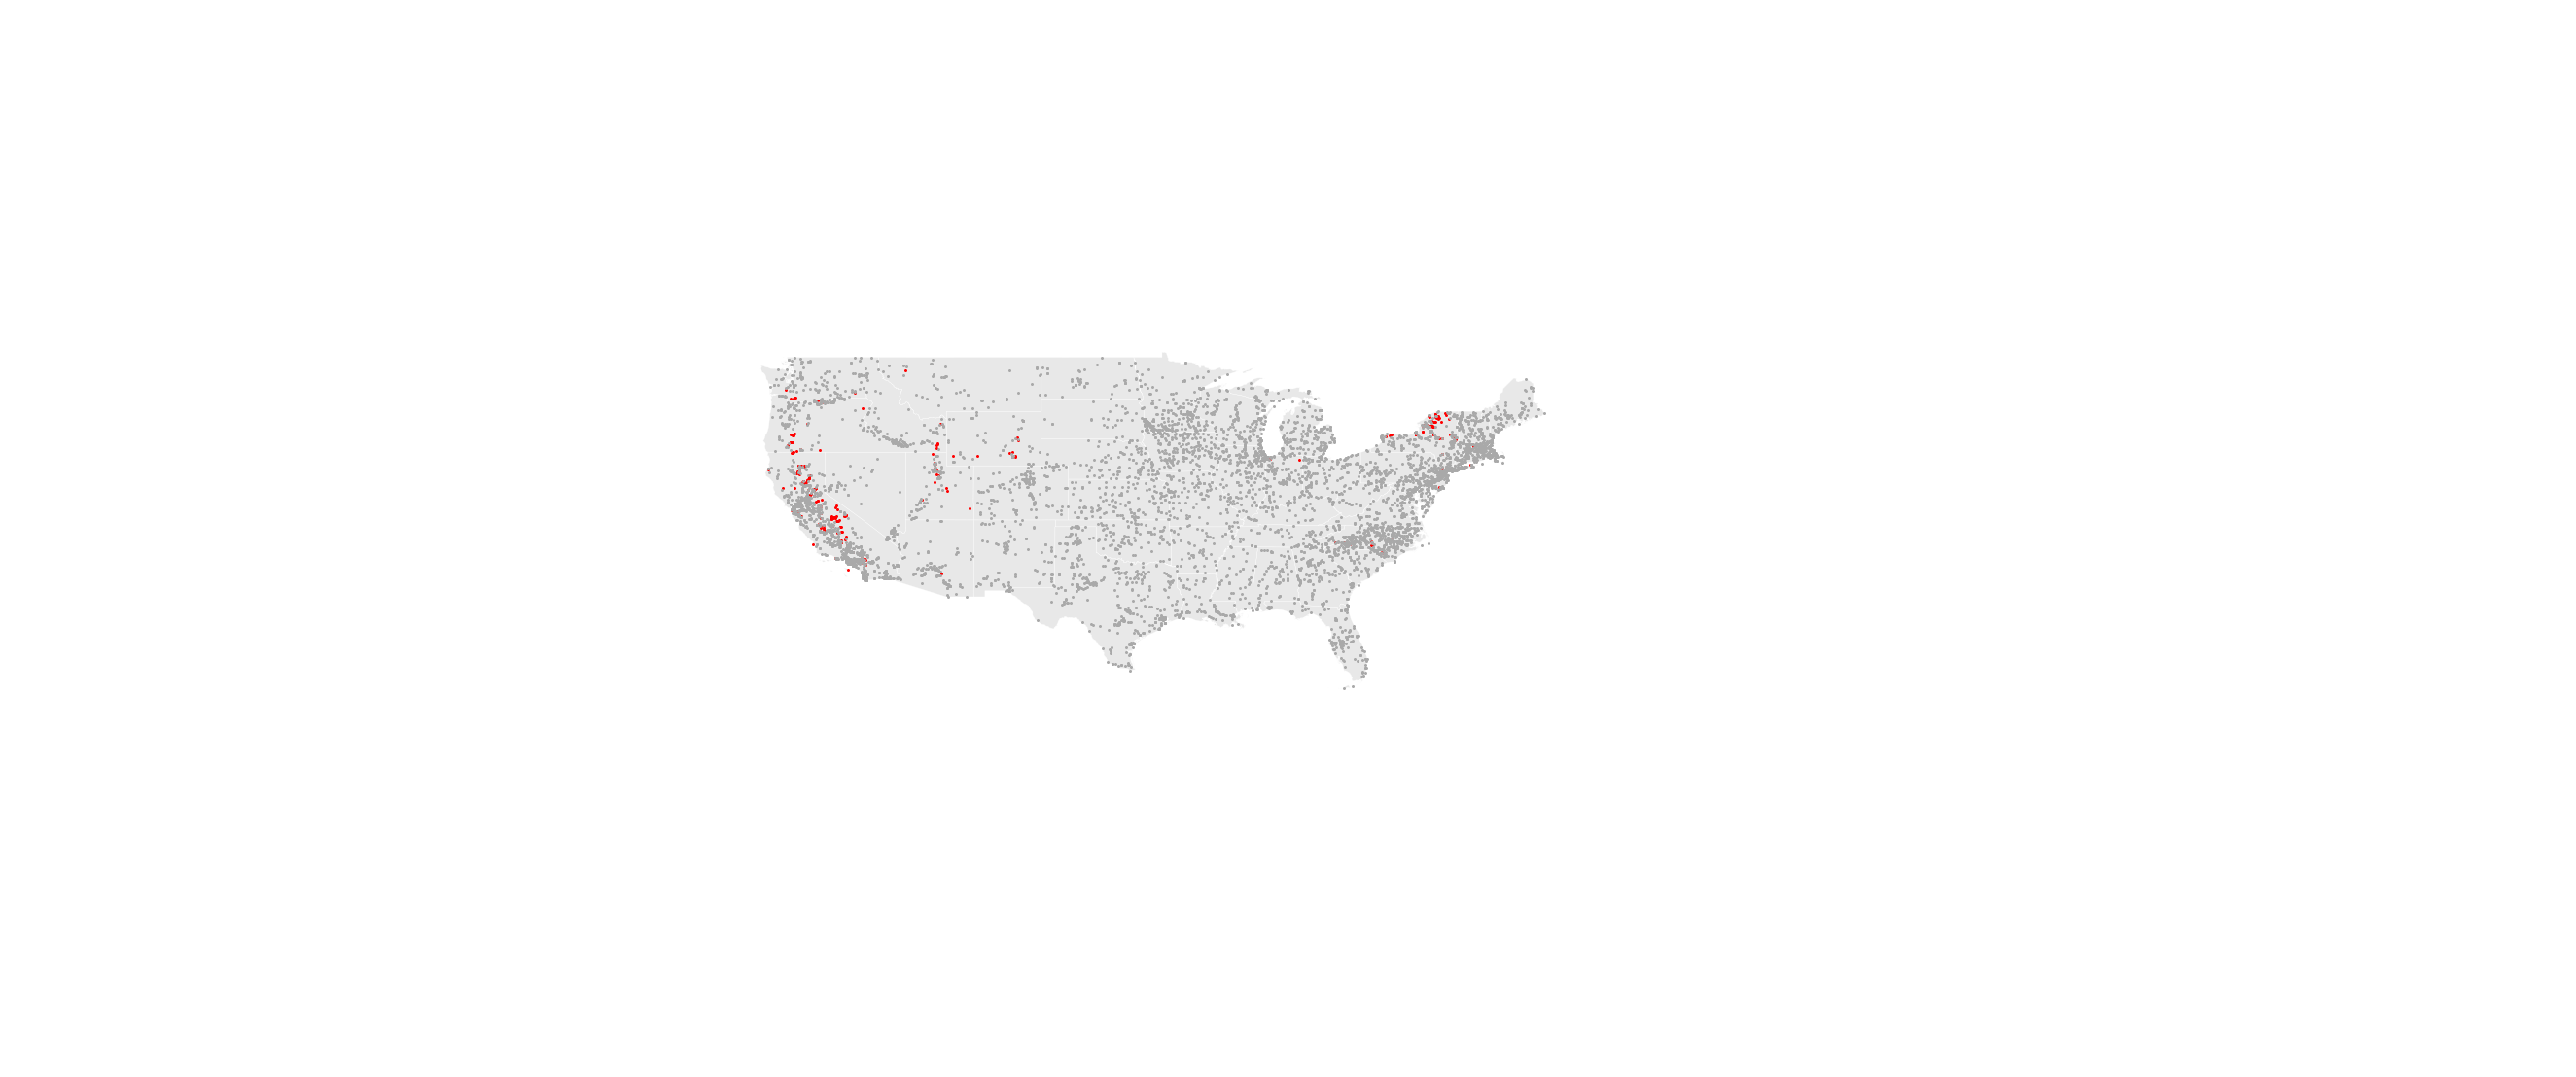

In [87]:
ax = states.plot(figsize=(20,20), color='lightgrey', linewidth=0.25, edgecolor='white')
common.plot(color='red', markeredgewidth=0, markersize=3, ax=ax)
rest.plot(color='darkgrey', markeredgewidth=0, markersize=3, ax=ax)
ax.set_xlim(-130,-50)
ax.set_ylim(20,50)
ax.axis('off')

## 5. Map all of the nuclear power plants in red, with the rest of the plants as dark grey.


In [88]:
st_nuc = geo_pp[(geo_pp.PrimSource == 'nuclear')]
st_else = geo_pp[~(geo_pp.PrimSource == 'nuclear')]

(-130.0, -50.0, 20.0, 50.0)

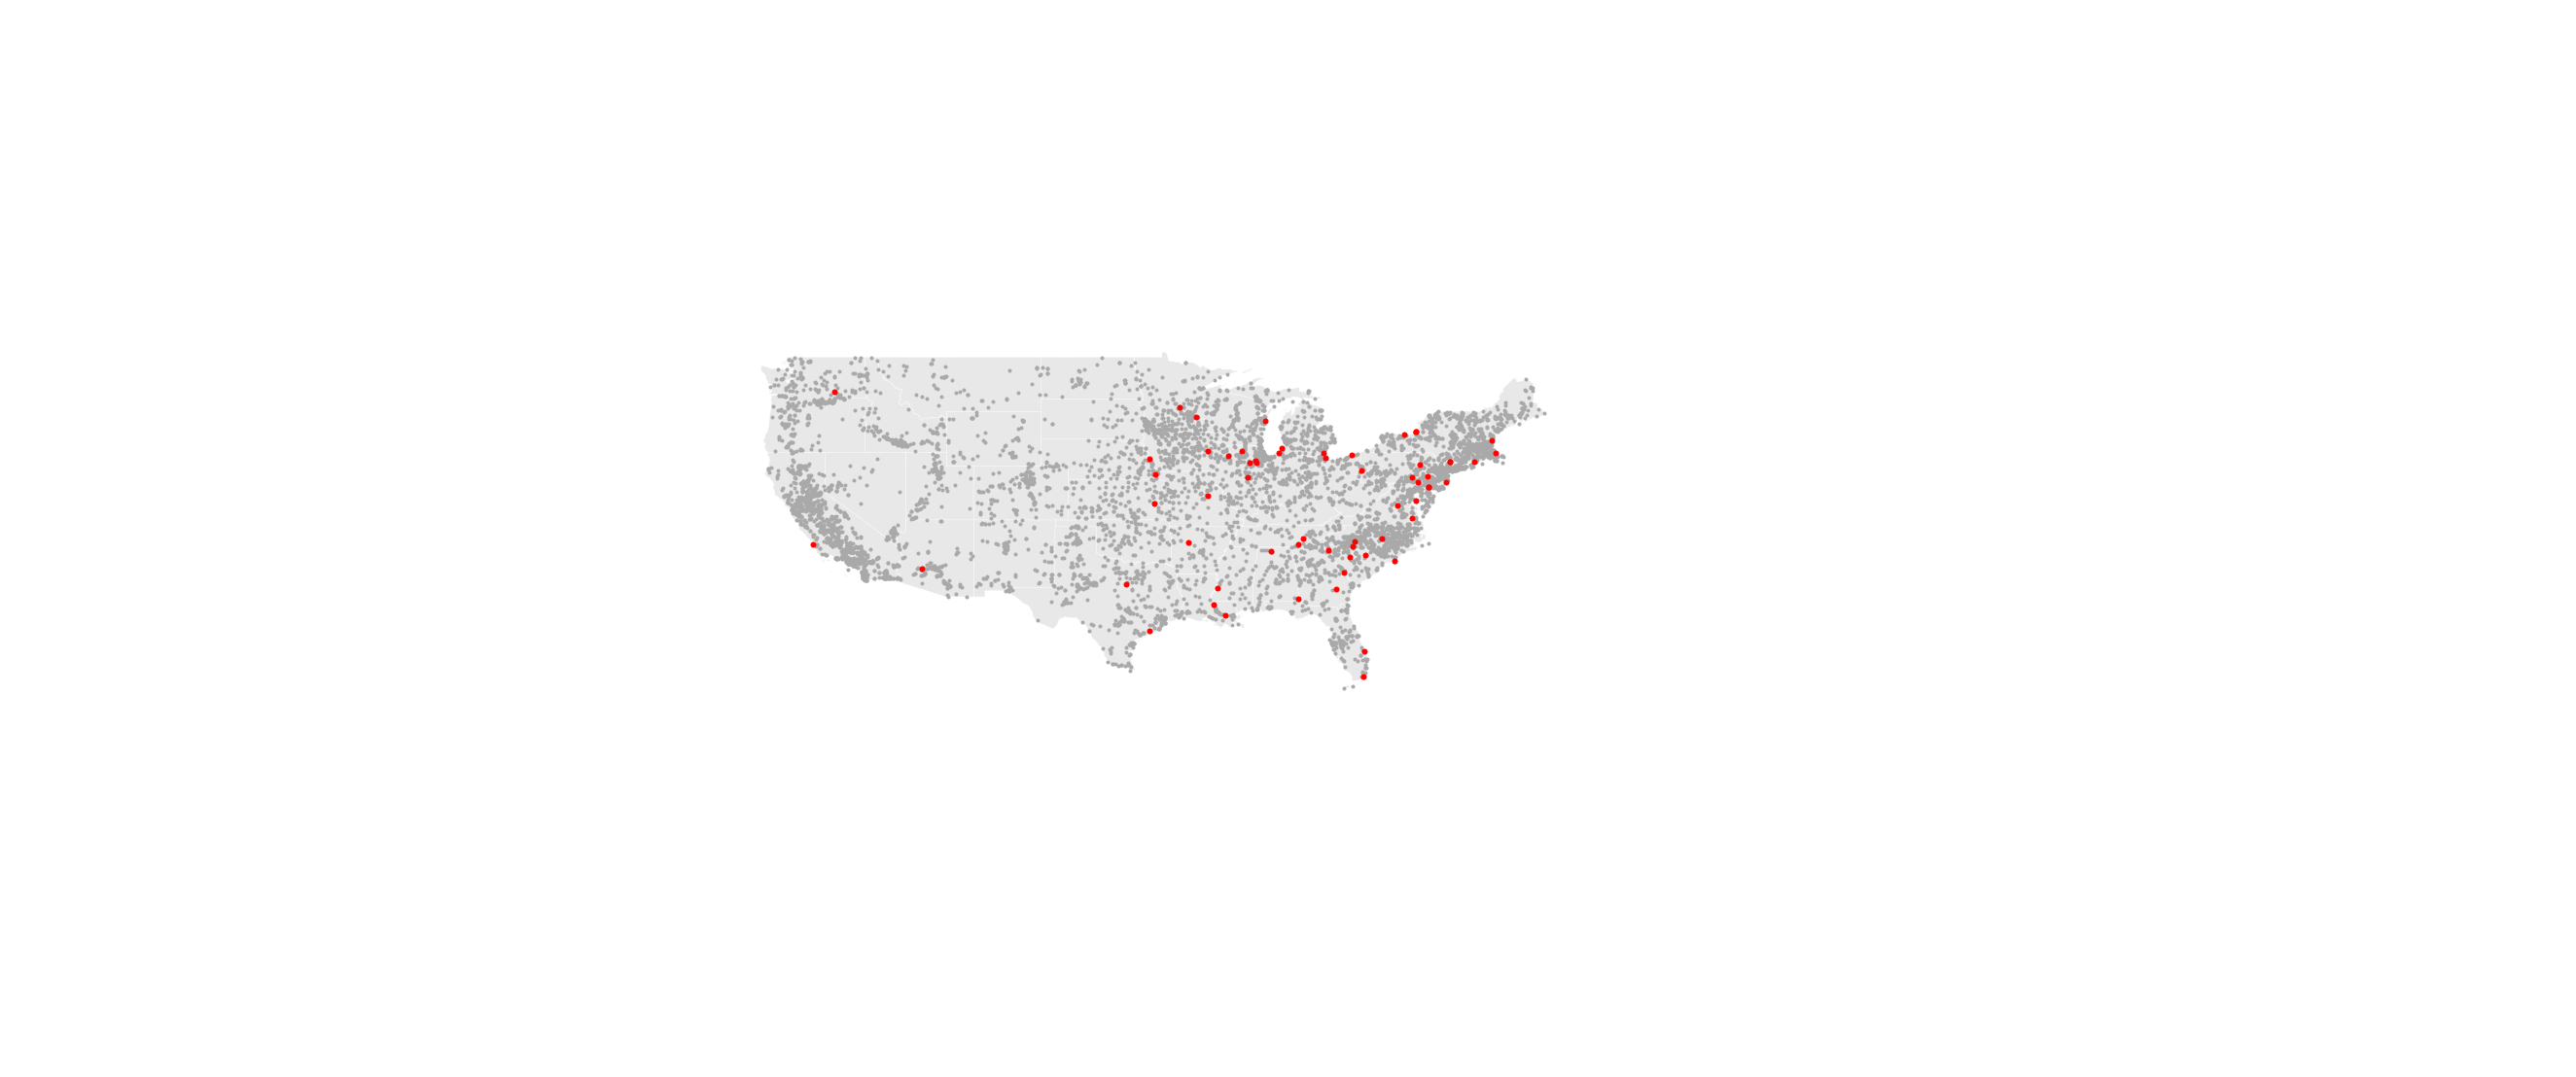

In [89]:
ax = states.plot(color='lightgrey', linewidth=0.25, edgecolor='white',figsize=(20,20))
st_else.plot(color='darkgrey', markersize=3, legend=True, figsize=(20,20), ax=ax)
st_nuc.plot(color='red', markersize=5, legend=True, figsize=(20,20), ax=ax)
ax.set_xlim(-130,-50)
ax.set_ylim(20,50)
ax.axis('off')

## 6. Map power plants that produce energy through both natural gas and oil.

In [90]:
both = geo_pp[(geo_pp['NG_MW'] >0) & (geo_pp['Crude_MW'] >0)]

(-130.0, -50.0, 20.0, 50.0)

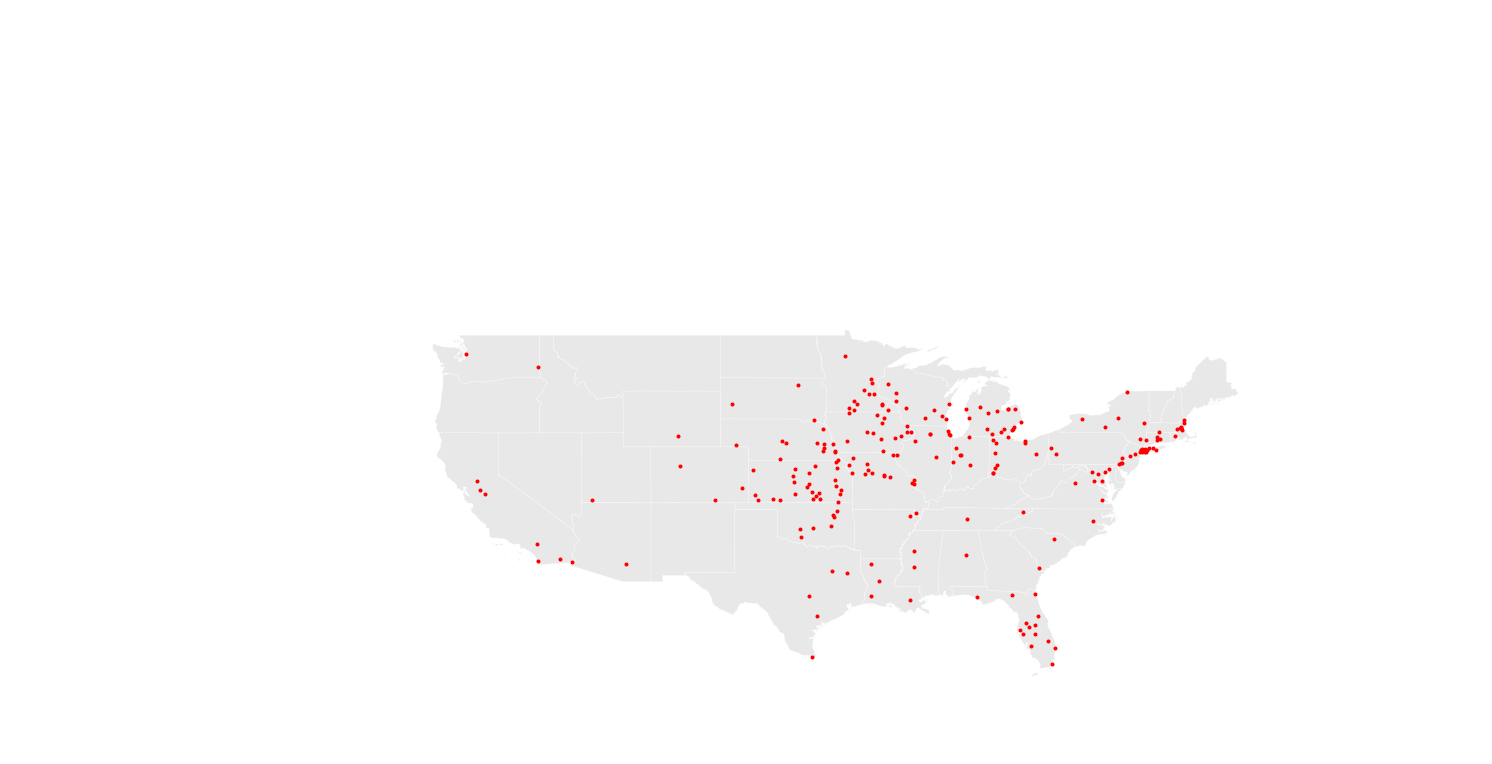

In [91]:
ax = states.plot(figsize=(20,20), color='lightgrey', linewidth=0.2, edgecolor='white')
both.plot(figsize=(20,20), color='red', markeredgewidth=0, markersize=4, ax=ax)
ax.set_xlim(-130,-50)
ax.set_ylim(20,50)
ax.axis('off')